<>:21: SyntaxWarning: invalid escape sequence '\C'
<>:21: SyntaxWarning: invalid escape sequence '\C'
C:\Users\admin\AppData\Local\Temp\ipykernel_13736\4291176903.py:21: SyntaxWarning: invalid escape sequence '\C'
  L2='cp\Cp_6.0.txt' # назва файлу (його адреса);
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Mmin= 0.0257 Хцм= 0.3 Yцм= 0
kM= 0.713


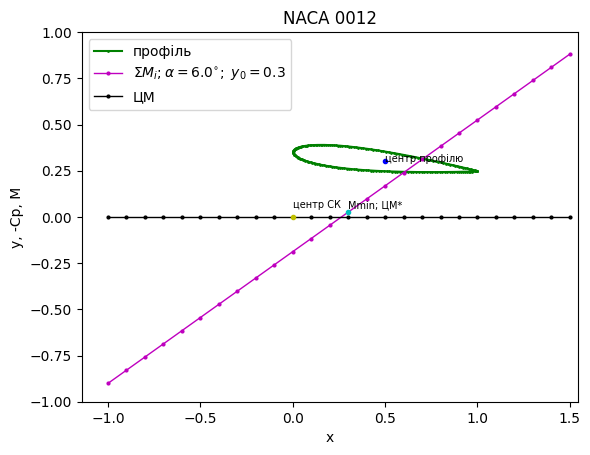

In [1]:
# Зчитування координат (x; y) з файлу NACA 0012.dat і координат (x; Cpi) з файлу Cp_6.0.txt та їх наступна побудова
# визначаємо сумарний момент на лінії y0=-0.3
import math
import numpy as np
import matplotlib.pyplot as plt
def Moment(x0,y0,x1,y1,x2,y2,Cp):
    Lx=x2-x1
    Ly=y2-y1
    L=(Lx*Lx+Ly*Ly)**0.5
    rx=x1-x0
    ry=y1-y0
    r=(rx*rx+ry*ry)**0.5
    rL=rx*Lx+ry*Ly
    cosA=rL/(r*L)
    d=r*cosA
    F=Cp*L
    M=F*d
    return M

L1='NACA 0012.dat'
L2='cp\Cp_6.0.txt' # назва файлу (його адреса);
f=6.0 #поворот на f°
y0=0.3

X1,Y1=[],[]
# відкриваємо файл для зчитування даних
f1 = open(L1, mode='r')
i=0
for row in f1:
    if i>0:
        s=row.split(' ')
        if len(s)==7:
            s=[s[1], s[6]]
        else:
            s=[s[1], s[5]]        
        s1=list(map(float, s))
        X1.append(s1[0])
        Y1.append(s1[1])
    i=i+1
f1.close()    
# поворот на f° та зміщення на 0.5 СК
f=f*np.pi/180 #f у радіанах
X11=np.array(X1)
Y11=np.array(Y1)
X1=(X11-0.5)*np.cos(f)+Y11*np.sin(f)+0.5
Y1=Y11*np.cos(f)-(X11-0.5)*np.sin(f)+y0
# будуємо з зчитаних даних профіль
plt.plot(X1, Y1, '-og',label='профіль', markersize=1)

X2,Y2=[],[]
f2 = open(L2, mode='r')
i=0
for row in f2:
    if i>5 and i<205:
        s=row.split(' ')
        if len(s[5])>1:
            s=[s[1], s[5]]
        elif len(s[4])>1:
            s=[s[1], s[4]]        
        s1=list(map(float, s))
        X2.append(s1[0])
        Y2.append(-s1[1])
    i=i+1
f2.close()

# # розподіл по профілю
# for i in range(1,len(X1)):
#     k=1 #масштаб для Cp
#     if i<100:
#         dx=X1[i]-X1[i-1]
#         dy=Y1[i]-Y1[i-1]
#         b=(dx*dx+dy*dy)**0.5
#         c=-Y2[i-1]*k
#         CpX=c*dx/b
#         CpY=c*dy/b
#         if c<0:
#             plt.quiver(X1[i-1], Y1[i-1], -CpY, CpX, color='b', units='xy', scale=1, width=0.005)
#         else:
#             plt.quiver(X1[i-1]+CpY, Y1[i-1]-CpX, -CpY, CpX, color='m', units='xy', scale=1, width=0.005)
#     else:
#         dx=X1[i]-X1[i-1]
#         dy=Y1[i]-Y1[i-1]
#         b=(dx*dx+dy*dy)**0.5
#         c=-Y2[i-1]*k
#         CpX=c*dx/b
#         CpY=c*dy/b
#         if c<0:
#             plt.quiver(X1[i-1], Y1[i-1], -CpY, CpX, color='r', units='xy', scale=1, width=0.005)
#         else:
#             plt.quiver(X1[i-1]+CpY, Y1[i-1]-CpX, -CpY, CpX, color='c', units='xy', scale=1, width=0.005)

# лінія ЦМ
Y0=[0 for i in range(-10,16)]
X0=[i/10 for i in range(-10,16)]

MM1=[] #сумарний момент сил, що діє на профіль відносно точки (x0;y0)
for i in range(len(X0)):    
    x0=X0[i]
    MM=[] #момент сили, що діє на точку профілю (X1[j];Y1[j]) відносно точки (x0;y0)
    for j in range(len(X1)-1):
        MM.append(Moment(x0,0,X1[j],Y1[j],X1[j+1],Y1[j+1],Y2[j]))
    MM1.append(round(sum(MM),4))
    
Mmin=min(map(abs, MM1))
for u in range(len(MM1)):
    if abs(MM1[u])==Mmin:
        nomer=u
        break
Mmin=MM1[nomer]
# nomer=MM1.index(Mmin)
print('Mmin=',Mmin, 'Хцм=',X0[nomer],'Yцм=',0)
k=(MM1[1]-MM1[0])/(X0[1]-X0[0])
plt.plot(X0, MM1, '-om',label=r'$\Sigma M_i; \alpha =$'+str(round(f*180/np.pi,1))+r'$^{\circ}; \ y_0=$'+str(y0), markersize=2, linewidth=1)
plt.plot(X0, Y0, '-ok',label='ЦМ', markersize=2, linewidth=1)

# кутовий коефіцієнт прямої сумарних моментів
k=(MM1[1]-MM1[0])/(X0[1]-X0[0])
print('kM=',round(k,4))

plt.plot(0, 0, '-oy', markersize=3) #центр СК
plt.annotate('центр СК', xy=(0,0.05), fontsize=7)

plt.plot(0.5, y0, '-ob', markersize=3) #центр профілю
plt.annotate('центр профілю', xy=(0.5,y0), fontsize=7)

plt.plot(X0[nomer], Mmin, '-oc', markersize=3) #мінімальний момент
plt.annotate('Mmin; ЦМ*', xy=(X0[nomer],0.05), fontsize=7)

plt.ylabel('y, -Cp, M')
plt.xlabel('x')
plt.title('NACA 0012')
plt.axis('equal')#однакові масштаби для x та y
plt.legend()
plt.ylim(-1, 1)
plt.xlim(-1.2, 1.6)
plt.show()

# 'b' blue
# 'g' green
# 'r' red
# 'c' cyan
# 'm' magenta
# 'y' yellow
# 'k' black
# 'w' white


